In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
path = "../Data/coffee/total-production.csv"
coffee_production_by_country = pd.read_csv(path).set_index("total_production")
coffee_production = coffee_production_by_country.T
coffee_production.index = coffee_production.index.astype("datetime64[ns]")

In [5]:
index_abr = {"Brazil": "BR",
             "Viet Nam": "VN", 
             "Colombia": "CO", 
             "Indonesia": "ID", 
             "Ethiopia": "ET", 
             "India": "IN", 
             "Mexico": "MX",
             "Guatemala": "GT",
             "Honduras": "HN",
             "Uganda": "UG"}

In [4]:
coffee_production.head(2)

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990-01-01,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.870,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991-01-01,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0


# Coffee Production Stats

* Create a bar chart of the top 10 coffee producers by total production in 'total-production.csv', sorted from highest to lowest. Change the xticks to two letter country abbreviations.


* Data Prep Code

<mark style="background-color: #000000"> coffee_production = pd.read_csv("coffee/total-production.csv").T </mark> 

<mark style="background-color: #000000"> coffee_production.columns = coffee_production.iloc[0] </mark> 

<mark style="background-color: #000000"> coffee_production = coffee_production.drop("total_production") </mark> 


In [5]:
top10_producers = coffee_production.sum(axis=0).sort_values(ascending=False)[:10]
top10_producers.rename(index=index_abr, inplace=True)
top10_producers

total_production
BR    1.190966e+06
VN    4.395410e+05
CO    3.458714e+05
ID    2.451168e+05
ET    1.415429e+05
IN    1.320257e+05
MX    1.269082e+05
GT    1.134011e+05
HN    1.054566e+05
UG    9.314637e+04
dtype: float64

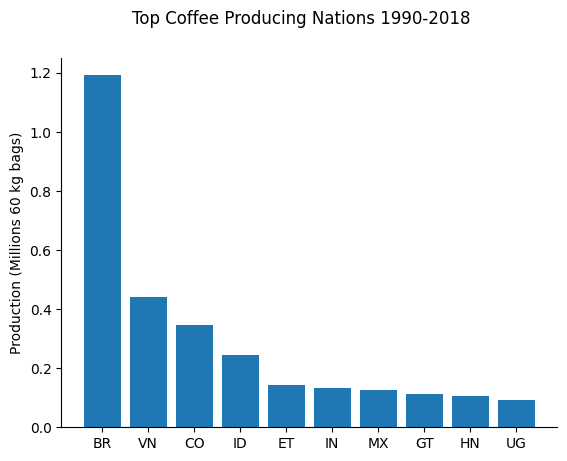

In [6]:
fig, ax = plt.subplots()

fig.suptitle("Top Coffee Producing Nations 1990-2018")

ax.bar(x = top10_producers.index,
       height= top10_producers / 1e6
)

ax.set_ylabel("Production (Millions 60 kg bags)")
ax.spines[["top", "right"]].set_visible(False)

plt.show()

# Top 5 over time

* Create a line chart with the top 5 nations over time. Make sure to include a legend! Consider converting the index to datetime64[ns].

In [7]:
coffee_production.head(2)

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990-01-01,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.870,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991-01-01,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0


In [8]:
top_5 = coffee_production[coffee_production.sum(axis=0).sort_values(ascending=False)[:5].index]
top_5.head()

total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia
1990-01-01,27285.6286,1310.288,14396.000,7441.383,2909.451
1991-01-01,27293.4934,1437.848,17980.397,8493.196,2924.664
1992-01-01,34603.3542,2340.447,14946.878,5569.478,1825.171
1993-01-01,28166.9786,3020.216,11422.422,6743.288,2967.004
1994-01-01,28192.0470,3631.609,12964.000,5367.878,2762.730


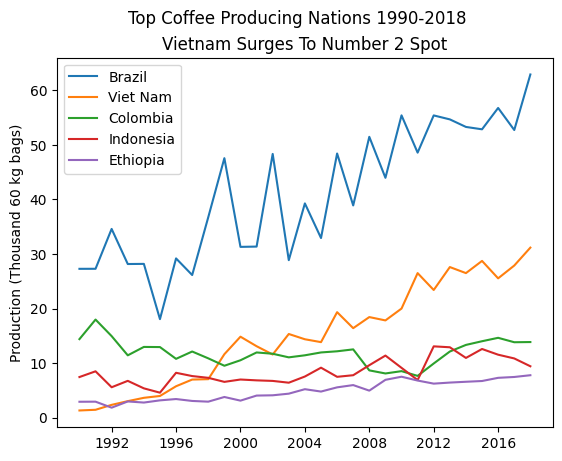

In [9]:
fig, ax = plt.subplots()

fig.suptitle("Top Coffee Producing Nations 1990-2018")

ax.plot(
    top_5.index,
    top_5 / 1000
)

ax.set_title("Vietnam Surges To Number 2 Spot")
ax.legend(top_5.columns)
ax.set_ylabel("Production (Thousand 60 kg bags)")

plt.show()

# COMPOSITION OVER TIME

Our client is interested in looking at how Brazil's share of global coffee production has changed over time.

Build a plot that global total production as well as Brazil's contribution to global production over time.

In [10]:
# coffee_production.drop(columns=["rest_of_world"], inplace=True)

In [3]:
brazil_vs_others = pd.DataFrame({"Brazil": coffee_production["Brazil"],
                                 "rest_of_world": coffee_production.sum(axis=1) - coffee_production["Brazil"]})
brazil_vs_others.head()

NameError: name 'coffee_production' is not defined

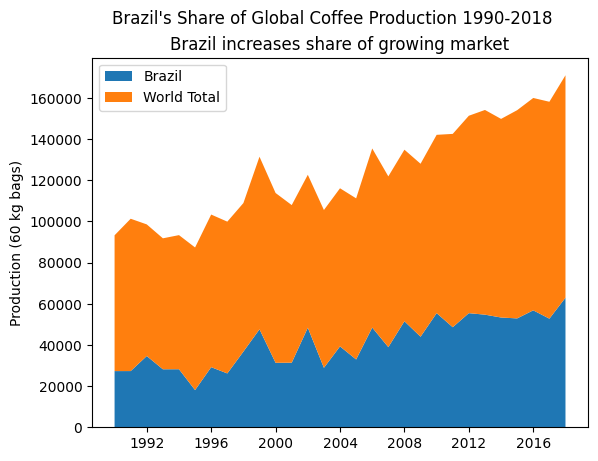

In [12]:
fig, ax = plt.subplots()

fig.suptitle("Brazil's Share of Global Coffee Production 1990-2018")

ax.stackplot(
    brazil_vs_others.index,
    brazil_vs_others["Brazil"],
    brazil_vs_others["rest_of_world"]
)

ax.set_title("Brazil increases share of growing market")
ax.set_ylabel("Production (60 kg bags)")

plt.legend(["Brazil", "World Total"])

plt.show()

## PRODUCTION RELATIONSHIPS

We want to explore how Brazil compares to its competitors in terms of production. Build a scatterplot  comparing Brazil Vs. VietNam Production and one comparing Brazil to Venezuela.

In [13]:
coffee_production[["Brazil", "Venezuela"]].head(2)

total_production,Brazil,Venezuela
1990-01-01,27285.6286,1122.477
1991-01-01,27293.4934,940.704


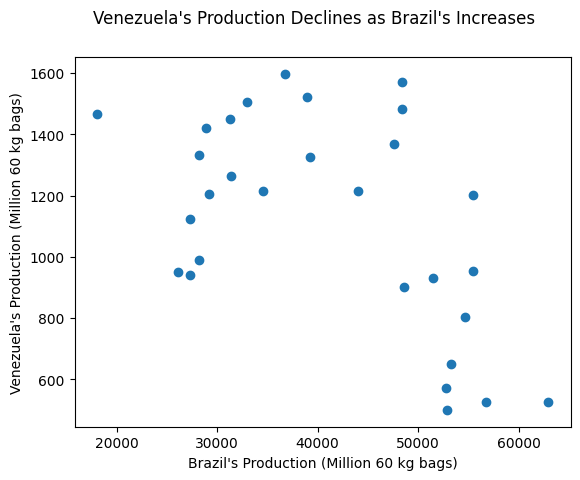

In [14]:
fig, ax = plt.subplots()

plt.suptitle("Venezuela's Production Declines as Brazil's Increases")

ax.scatter(
    coffee_production["Brazil"],
    coffee_production["Venezuela"]
)

ax.set_xlabel("Brazil's Production (Million 60 kg bags)")
ax.set_ylabel("Venezuela's Production (Million 60 kg bags)")

plt.show()

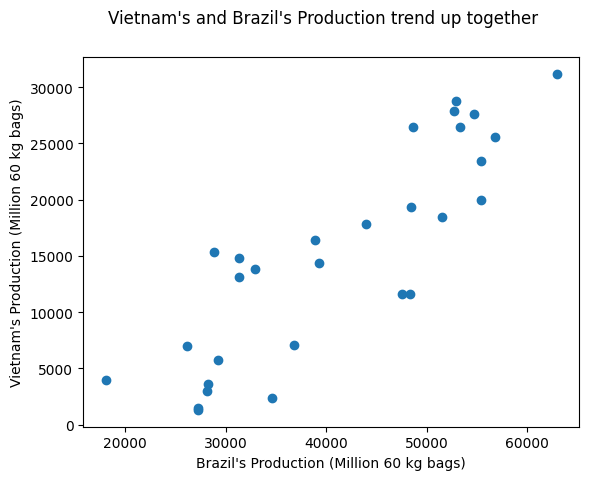

In [15]:
fig, ax = plt.subplots()

plt.suptitle("Vietnam's and Brazil's Production trend up together")

ax.scatter(
    coffee_production["Brazil"],
    coffee_production["Viet Nam"]
)

ax.set_xlabel("Brazil's Production (Million 60 kg bags)")
ax.set_ylabel("Vietnam's Production (Million 60 kg bags)")

plt.show()

# COMPOSITION OF COFFEE PRODUCTION

* Create a Pie chart with the top 5 producers, as well as the sum for the rest of countries.

* Finally, create two donut charts, one representing Brazil's share of global production in 1990, and one for Brazil's share in 2018.

In [16]:
coffee_production_top5_2018 = coffee_production.loc["2018-01-01", :].sort_values(ascending=False)[:5]
coffee_production_top5_2018["Rest of World"] = sum(coffee_production.loc["2018-01-01", :]) - sum(coffee_production_top5_2018)
coffee_production_top5_2018

total_production
Brazil           62924.8836
Viet Nam         31174.0742
Colombia         13857.9620
Indonesia         9417.5942
Ethiopia          7776.2234
Rest of World    45786.0003
Name: 2018-01-01 00:00:00, dtype: float64

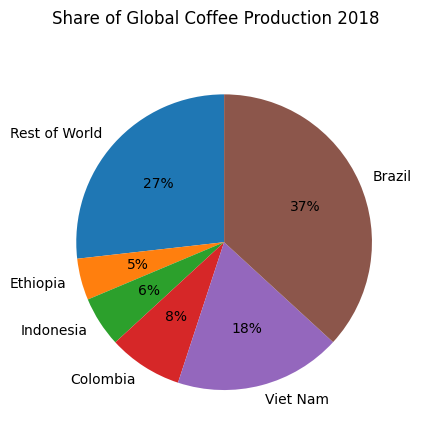

In [17]:
fig, ax = plt.subplots()

fig.suptitle("Share of Global Coffee Production 2018")

ax.pie(
    coffee_production_top5_2018[::-1],
    labels=coffee_production_top5_2018.index[::-1],
    autopct="%.0f%%",
    startangle=90
)

plt.show()

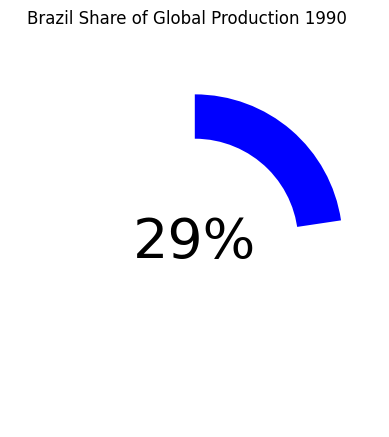

In [18]:
brazil = brazil_vs_others.loc["1990-01-01", "Brazil"]
others = sum(brazil_vs_others.loc["1990-01-01"])

fig, ax = plt.subplots()

fig.suptitle("Brazil Share of Global Production 1990")

ax.pie(
    [others, brazil],
    colors=["white", "blue"],
    startangle=90
)

hole = plt.Circle((0, 0), .7, fc="white")
fig = plt.gcf()

# Adding Cirle in Pie chart
fig.gca().add_artist(hole)

plt.text(
    0,
    0,
    str(int(brazil / others * 100)) + "%",
    ha="center",
    va="center",
    fontsize=40
)

plt.show()

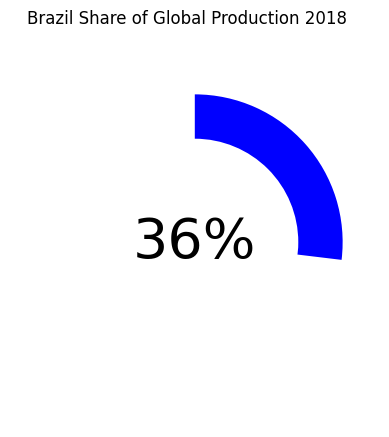

In [19]:
brazil = brazil_vs_others.loc["2018-01-01", "Brazil"]
others = sum(brazil_vs_others.loc["2018-01-01"])

fig, ax = plt.subplots()

fig.suptitle("Brazil Share of Global Production 2018")

ax.pie(
    [others, brazil],
    colors=["white", "blue"],
    startangle=90
)

hole = plt.Circle((0, 0), .7, fc="white")
fig = plt.gcf()

# Adding Cirle in Pie chart
fig.gca().add_artist(hole)

plt.text(
    0,
    0,
    str(int(brazil / others * 100)) + "%",
    ha="center",
    va="center",
    fontsize=40
)

plt.show()

# Coffee Consumption Vs. Prices

Compare coffee prices with coffee consumption in the following countries. 

Is there a relationship between coffee consumption and the price these countries pay?

Plot a dual axis bar chart of price vs consumption totals for these countries.

In [20]:
consumption = pd.read_csv("../Data/coffee/imports.csv")
consumption.head()

,imports,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,1880.0,2058.0,2206.0,1836.0,1417.0,1231.0,1210.0,1294.0,1293.0,...,1309.0,1369.0,1452.0,1559.0,1555.0,NaN,NaN,NaN,NaN,NaN
1,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5916.0,5924.0,5828.0,5668.0,5502.0,NaN,NaN,NaN,NaN,NaN
2,Belgium/Luxembourg,2015.0,1746.0,1828.0,2063.0,2262.0,2401.0,2526.0,2544.0,3580.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bulgaria,268.0,200.0,182.0,397.0,463.0,515.0,272.0,294.0,342.0,...,523.0,528.0,482.0,560.0,609.0,NaN,NaN,NaN,NaN,NaN
4,Croatia,NaN,NaN,168.0,163.0,193.0,320.0,322.0,385.0,339.0,...,394.0,394.0,391.0,384.0,413.0,NaN,NaN,NaN,NaN,NaN


In [21]:
avg_consumption = pd.DataFrame({"Country": consumption["imports"], "Avg Consumption": consumption.iloc[:, 1:].mean(axis=1)})
avg_consumption = avg_consumption.set_index("Country")
avg_consumption

,Avg Consumption
Country,
Austria,1551.083333
Belgium,4639.533333
Belgium/Luxembourg,2329.444444
Bulgaria,397.250000
Croatia,349.136364
...,...
South America,949.063449
Argentina,626.416914
Chile,261.124677


In [22]:
prices = pd.read_csv("../Data/coffee/retail-prices.csv")
prices.head()

,retail_prices,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,10.816777,10.088300,11.015453,10.971302,10.110375,11.434879,11.964680,9.646799,8.763797,...,15.342163,14.768212,18.366446,18.498896,19.028698,19.050773,16.423841,12.450331,13.730684,14.635762
1,Cyprus,6.247241,6.181015,6.335541,5.739514,7.019868,9.403974,9.116998,8.918322,10.176600,...,12.207506,11.501104,13.377483,14.039735,14.282561,14.304636,11.699779,11.699779,12.141280,12.781457
2,Denmark,8.410596,8.101545,8.366446,7.682119,9.823400,12.295806,10.618102,10.949227,10.860927,...,11.677704,12.008830,15.275938,14.834437,14.039735,14.194260,12.913907,10.905077,11.103753,11.699779
3,Finland,6.578366,6.004415,5.430464,4.282561,6.026490,8.763797,7.108168,7.726269,7.549669,...,7.748344,8.145695,11.832230,10.596026,9.470199,9.514349,8.609272,8.101545,9.050773,9.359823
4,France,8.233996,7.571744,5.099338,4.481236,5.298013,8.145695,7.284768,6.092715,6.136865,...,8.366446,7.991170,9.116998,8.653422,8.653422,8.322296,6.865342,7.196468,7.505519,8.123620


In [23]:
avg_price = pd.DataFrame({"Country": prices["retail_prices"], "Avg Price": prices.iloc[:, 1:].mean(axis=1)})
avg_price = avg_price.set_index("Country")
avg_price

,Avg Price
Country,
Austria,11.571135
Cyprus,10.437695
Denmark,10.494025
Finland,7.211692
France,6.850879
Germany,9.515110
Italy,14.199589
Netherlands,8.931263
Portugal,10.921063


In [24]:
price_con = pd.concat([avg_price, avg_consumption], axis=1, join="inner").sort_values(by="Avg Consumption", ascending=False)
price_con

,Avg Price,Avg Consumption
Country,,
Germany,9.515110,16357.666667
Japan,21.472939,6862.275235
Italy,14.199589,6696.958333
France,6.850879,6512.458333
Spain,8.029992,4046.291667
Netherlands,8.931263,2928.125000
Sweden,8.054350,1620.625000
Austria,11.571135,1551.083333
Finland,7.211692,1157.541667


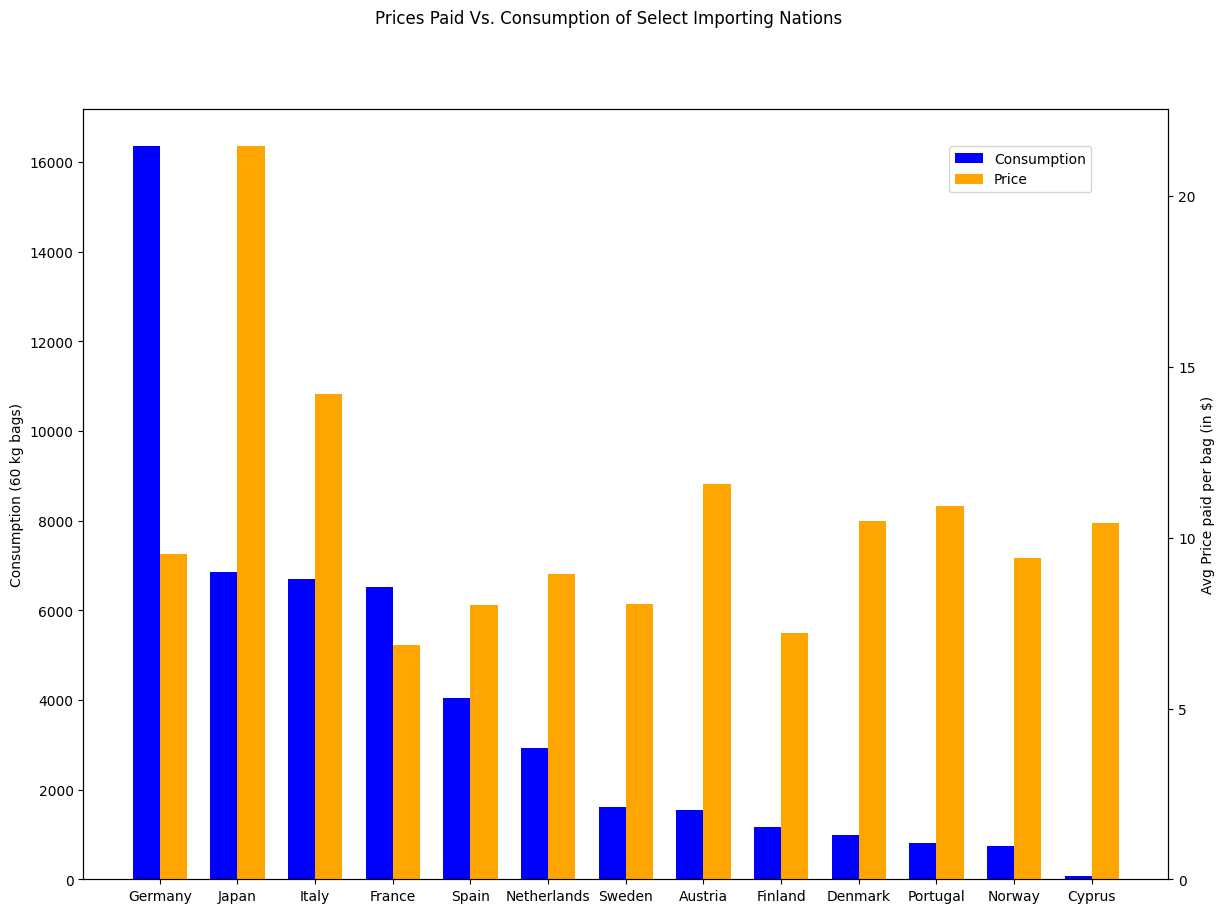

In [30]:
fig, ax = plt.subplots(figsize=(14,10))

fig.suptitle("Prices Paid Vs. Consumption of Select Importing Nations")

width = .35

x = np.arange(len(price_con))

ax.bar(
    x-width/2,
    price_con["Avg Consumption"],
    color = "blue",
    label = "Consumption",
    width=width
)

ax.set_ylabel("Consumption (60 kg bags)")

ax2 = ax.twinx()

ax2.bar(
    x+width/2,
    price_con["Avg Price"],
    color = "orange",
    label="Price",
    width=width
)

ax2.set_ylabel("Avg Price paid per bag (in $)")

plt.xticks(x,
           price_con.index.str.strip(" "),
           fontsize=7)

fig.legend(bbox_to_anchor=(.85, .85))

plt.show()